In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv("1.03.+Dummies.csv")
raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [3]:
data = raw_data.copy()

In [4]:
data["Attendance"] = data["Attendance"].map({"Yes":1, "No":0})
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [5]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [6]:
y = data["GPA"]
x1 = data[["SAT", "Attendance"]]

In [7]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           2.19e-15
Time:                        11:49:07   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

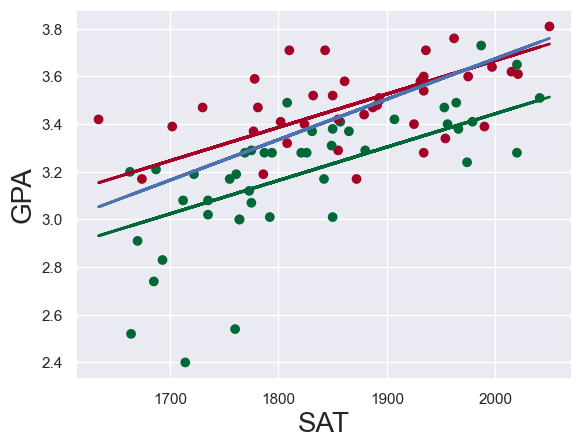

In [8]:
plt.scatter(data["SAT"], y, c=data["Attendance"], cmap="RdYlGn_r")
yhat_no = 0.6439 + 0.0014 * data["SAT"]
yhat_yes = 0.8665 + 0.0014 * data["SAT"]
yhat = 0.0017 * data["SAT"] + 0.275
fig = plt.plot(data["SAT"], yhat_no, lw=2, c="#006837", label="regression line 1")
fig = plt.plot(data["SAT"], yhat_yes, lw=2, c="#a50026", label="regression line 2")
fig = plt.plot(data["SAT"], yhat, lw=2, c="#4C72B0", label="regression line 3")
plt.xlabel("SAT", fontsize=20)
plt.ylabel("GPA", fontsize=20)
plt.show()

# different example

In [9]:
dt2 = pd.read_csv("real_estate_price_size_year_view.csv")
dt2

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
...,...,...,...,...
95,252460.400,549.80,2009,Sea view
96,310522.592,1037.44,2009,No sea view
97,383635.568,1504.75,2006,No sea view
98,225145.248,648.29,2015,No sea view


In [10]:
dt2_new = dt2.copy()
dt2_new["view"] = dt2["view"].map({"Sea view":1, "No sea view":0})
dt2_new

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1
...,...,...,...,...
95,252460.400,549.80,2009,1
96,310522.592,1037.44,2009,0
97,383635.568,1504.75,2006,0
98,225145.248,648.29,2015,0


In [11]:
y2 = dt2_new["price"]
x1_2 = dt2_new[["size","year","view"]]

In [12]:
x2 = sm.add_constant(x1_2)
results2 = sm.OLS(y2, x2).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Sat, 08 Jul 2023   Prob (F-statistic):           1.02e-50
Time:                        11:49:07   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
view        5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Predict a value

In [15]:
new_data = pd.DataFrame({"const":1, "SAT":[1700, 1670], "Attendance":[0,1]})
new_data = new_data[["const", "SAT", "Attendance"]]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [19]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [26]:
predictionsdf= pd.DataFrame({"Predictions":predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0:"Bob", 1:"Alice"})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
